# CMPT 733 - Spring 2023
# Neural fields

__content creator:__ Aryan Mikaeili

In [17]:
import torch
import numpy as np
import torch.nn as nn
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython import display

In [4]:
#@title visualization function
def visualize(coords, value, gt_value, epoch, save=False):
    xlims = [-np.pi, np.pi]
    plt.figure()
    plt.axis("equal")
    plt.xlabel("t")
    plt.ylabel("f(t)")
    plt.xlim(xlims)
    plt.ylim(0, 0.8)

    t, f = coords, value.data.numpy()
    plt.plot(t, gt_value, "-r", label="ground truth")
    plt.plot(t, f, "-b", label="reconstruction")
    plt.title(f"MLP fitting at epoch={epoch}, #datapoints={t.shape[0]}")
    plt.legend()
    if save:
        plt.savefig(f"imgs/task1_{epoch:04}.png")
    else:
         display.clear_output(wait=True)
         display.display(plt.gcf())

In [8]:
#@title define function
def sin_func(x):
  return torch.sin(4 * x) + torch.sin(24 * x)

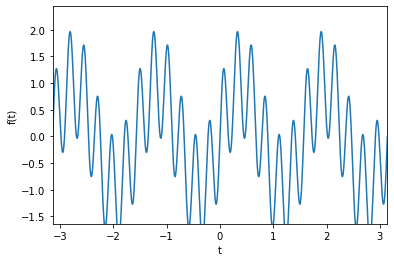

In [11]:
#display function

coords = np.linspace(-np.pi, np.pi, 10000)
values = sin_func(torch.from_numpy(coords))

xlims = [-np.pi, np.pi]
plt.figure()
plt.axis("equal")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.xlim(xlims)
plt.ylim(0, 0.8)

plt.plot(coords, values)
plt.show()



In [ ]:
#@title sampling function
def sample_coords(num_samples):
  ##TODO: randomly sample coords from -pi -> pi
  ##TODO: sort the samples
  ##TODO: compute ground truth using sin_func
  coords = ...
  values = ...
  return coords, values


In [12]:
#@title define vanilla model
class SimpleModel(nn.Module):
  def __init__(self, input_dim = 1, output_dim = 1, hidden_dim = 64, num_hidden = 3):
     super(SimpleModel, self).__init__()

     self.layers = nn.ModuleList()

     ##TODO: define linear model with #num_hidden layers with dimension #hidden_dim

     self.layers = nn.Sequential(*self.layers)
  def forward(self, x):
    return self.layers(x)

In [ ]:
#@title train model
sample_num = 128
max_epochs = 1000
learning_rate = 1.0e-3

model = SimpleModel()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

pbar = tqdm(range(max_epochs))
for epoch in pbar:
        coords, values = sample_coords(sample_num)

        output = model(coords)

        loss = loss_fn(output, values)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        pbar.set_description("Epoch {}: loss={:.4f}".format(epoch, loss))
        if epoch % 100 == 0:
          visualize(coords, output, values, epoch, save=False)

In [14]:
#@title define PE model

class PEModel(nn.Module):
  def __init__(self, num_res = 5):
    super(PEModel, self).__init__()
    ##TODO: define model using SimpleModel. You just have to calculate input dimension

    self.model = ...

  def encode_input(self, x):
    ##TODO: implement positional encoding
    return x
  
  def forward(self, x):
    ##TODO: implement forward function
    return x

    

In [ ]:
#@title: train PE model

sample_num = 128
max_epochs = 1000
learning_rate = 1.0e-3

model = PEModel()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

pbar = tqdm(range(max_epochs))
for epoch in pbar:
        coords, values = sample_coords(sample_num)

        output = model(coords)

        loss = loss_fn(output, values)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        pbar.set_description("Epoch {}: loss={:.4f}".format(epoch, loss))
        if epoch % 100 == 0:
          visualize(coords, output, values, epoch, save=False)